##<div style="direction:ltr;text-align:left;font-family:Arial, Tahoma">Arithmetic Operations</div>
<div style="direction:ltr;text-align:left;font-family:Arial, Tahoma"> Arithmetic operations are simple operations that allow us to directly increase or decrease the color intensity. <br> The operations are performed on corresponding elements of two arrays with the same dimensions, and the final result will be a decrease or increase in the image brightness. </div>

##<div style="direction:ltr;text-align:left;font-family:Arial, Tahoma">Reminder</div>
<div style="direction:ltr;text-align:left;font-family:Arial, Tahoma"> Since images in OpenCV use the data type `uint8`, which is an 8-bit unsigned integer, <br> and considering that 8 bits can represent \(2^8 = 256\) different values, values outside the range 0–255 are not allowed. If a larger number is assigned, the variable will overflow. </div>

In [1]:
import numpy as np

a = np.ones([2], dtype = "uint8")
b = a * 100
print(b)
print(b + 155)
print(b + 160)

[100 100]
[255 255]
[4 4]


<div style="direction:rtl;text-align:right;font-family:Tahoma">
Naturally, when broadcasting is not performed and we add matrices of the same size element-wise, we obtain similar results.
</div>

In [2]:
import numpy as np

m1 = np.array([[150, 155], [156, 157]], dtype = "uint8")
m2 = np.ones([2,2], dtype = "uint8") * 100
print("m1:")
print(m1)
print("m2:")
print(m2)
print("m1+m2:")
print(m1 + m2)

m1:
[[150 155]
 [156 157]]
m2:
[[100 100]
 [100 100]]
m1+m2:
[[250 255]
 [  0   1]]


<div style="direction:rtl;text-align:right;font-family:Tahoma">
There were various solutions to address this problem, including ...</div>

In [3]:
m1 = np.array([[150, 155], [156, 157]], dtype = "uint8")
m2 = np.ones([2,2], dtype = "uint8") * 100 #or you can simply write 100

modified_m1 = m1.astype('int16') + m2
modified_m1 = np.minimum(modified_m1, 255)
modified_m1 = modified_m1.astype('uint8')
modified_m1

array([[250, 255],
       [255, 255]], dtype=uint8)

In [4]:
import numpy as np

m1 = np.array([[150, 155], [156, 157]], dtype = "uint8")

value_to_add = 100
max_threshold = 255 - 100

m1[m1 >= max_threshold] = 255
m1[m1 < max_threshold] += value_to_add

print(m1)

[[250 255]
 [255 255]]


##<div style="direction:ltr;text-align:left;font-family:Arial, Tahoma">Arithmetic Operations in OpenCV</div>
<div style="direction:ltr;text-align:left;font-family:Arial, Tahoma"> If we use the functions <b>cv2.add</b> and <b>cv2.subtract</b>, we will not encounter this problem, and values below 0 will remain 0, while values above 255 will remain 255. </div>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/alpha.jpg')

# Create a matrix of ones, then multiply it by a scaler of 100
# This gives a matrix with same dimesions of our image with all values being 100
M = np.ones(image.shape, dtype = "uint8") * 100

added = cv2.add(image, M)
subtracted = cv2.subtract(image, M)


plt.figure(figsize=[15,5])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(added[...,::-1]);plt.title("Added");
plt.subplot(133);plt.imshow(subtracted[...,::-1]);plt.title("Subtracted");


cv2.imshow("Original", image)
cv2.imshow("Added", added)
cv2.imshow("Subtracted", subtracted)

cv2.waitKey(0)
cv2.destroyAllWindows()

## <div style="direction:ltr;text-align:left;font-family:Arial, Tahoma">Practical Example: Combining Color Images</div>

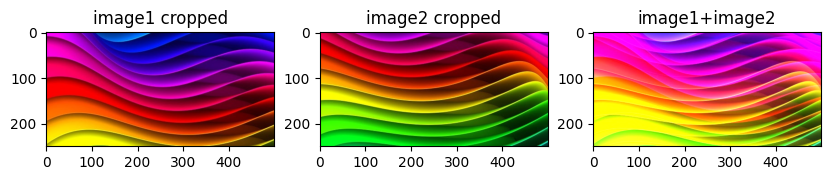

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('images/alpha.jpg')
h, w = img1.shape[:2]

# Slice safely
img2 = img1[100:h, 100:w]

# Make img1 same size as img2
img1_cropped = img1[0:h-100, 0:w-100]

# Add
output_image = cv2.add(img1_cropped, img2)

# Display
plt.figure(figsize=[10,5])
plt.subplot(131); plt.imshow(img1_cropped[...,::-1]); plt.title("image1 cropped")
plt.subplot(132); plt.imshow(img2[...,::-1]); plt.title("image2 cropped")
plt.subplot(133); plt.imshow(output_image[...,::-1]); plt.title("image1+image2")
plt.show()


In [3]:
import cv2
import numpy as np

img1 = cv2.imread('./images/alpha.jpg')
img2 = cv2.imread('./images/alpha.jpg')

print(img1.shape)
print(img2.shape)

(350, 600, 3)
(350, 600, 3)


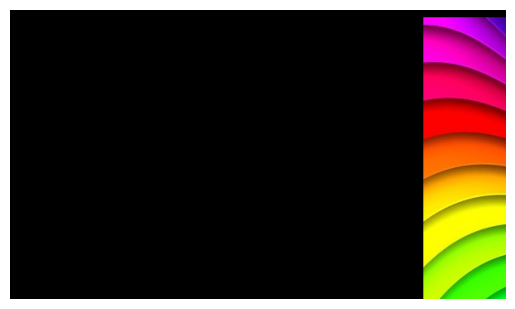

In [5]:
import numpy as np
import matplotlib.pyplot as plt

logo_h, logo_w, _ = img2.shape
location_h = 10
location_w = 500

# Compute max height and width that fit in img1
h, w, _ = img1.shape
max_h = min(logo_h, h - location_h)
max_w = min(logo_w, w - location_w)

# Create padded image
padded_img2 = np.zeros_like(img1)

# Copy only the portion that fits
padded_img2[location_h:location_h+max_h, location_w:location_w+max_w, :] = img2[:max_h, :max_w, :]

plt.imshow(padded_img2[..., ::-1])
plt.axis("off")
plt.show()


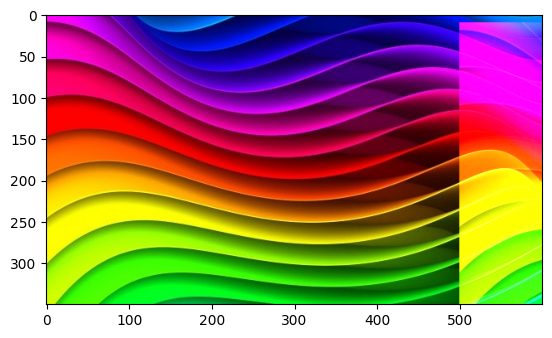

In [6]:
output_image = cv2.add(img1,padded_img2)
plt.imshow(output_image[...,::-1])

<div style="direction:ltr;text-align:left;font-family:Arial, Tahoma"> Alpha and beta appear in the second formula. </div> <br> $$ g(x) = (1 - \alpha) f_0(x) + \alpha f_1(x) $$ $$ \text{dst} = \alpha \cdot \text{img1} + \beta \cdot \text{img2} + \gamma $$ <br> [OpenCV Documentation – Image Arithmetic](https://docs.opencv.org/3.2.0/d0/d86/tutorial_py_image_arithmetics.html)

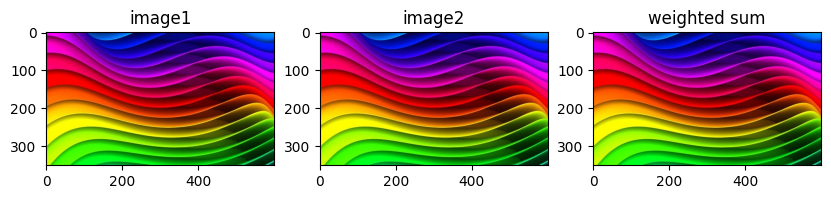

In [8]:
img1 = cv2.imread('./images/alpha.jpg')
img2 = cv2.imread('./images/alpha.jpg')
output_image = cv2.addWeighted(img1,0.3,img2,0.7,0)

plt.figure(figsize=[10,5])
plt.subplot(131);plt.imshow(img1[...,::-1]);plt.title("image1");
plt.subplot(132);plt.imshow(img2[...,::-1]);plt.title("image2");
plt.subplot(133);plt.imshow(output_image[...,::-1]);plt.title("weighted sum");

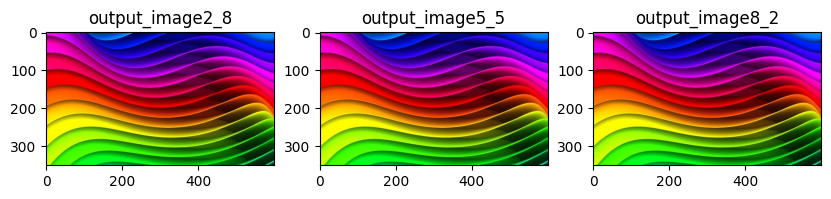

In [9]:
output_image2_8 = cv2.addWeighted(img1,0.2,img2,0.8,0)
output_image5_5 = cv2.addWeighted(img1,0.5,img2,0.5,0)
output_image8_2 = cv2.addWeighted(img1,0.8,img2,0.2,0)

plt.figure(figsize=[10,5])
plt.subplot(131);plt.imshow(output_image2_8[...,::-1]);plt.title("output_image2_8");
plt.subplot(132);plt.imshow(output_image5_5[...,::-1]);plt.title("output_image5_5");
plt.subplot(133);plt.imshow(output_image8_2[...,::-1]);plt.title("output_image8_2");